In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from windrose import WindroseAxes
import numpy as np

In [40]:
#Load the data
data = pd.read_excel("HUBV PM _ MET 6-23 to 7-5-2023.xlsx")

In [41]:
# Convert 'Calm' values in Wind Dir V to a numeric value (e.g., 0)
data['Wind Dir V'] = data['Wind Dir V'].apply(lambda x: 0 if x == 'Calm' else x)

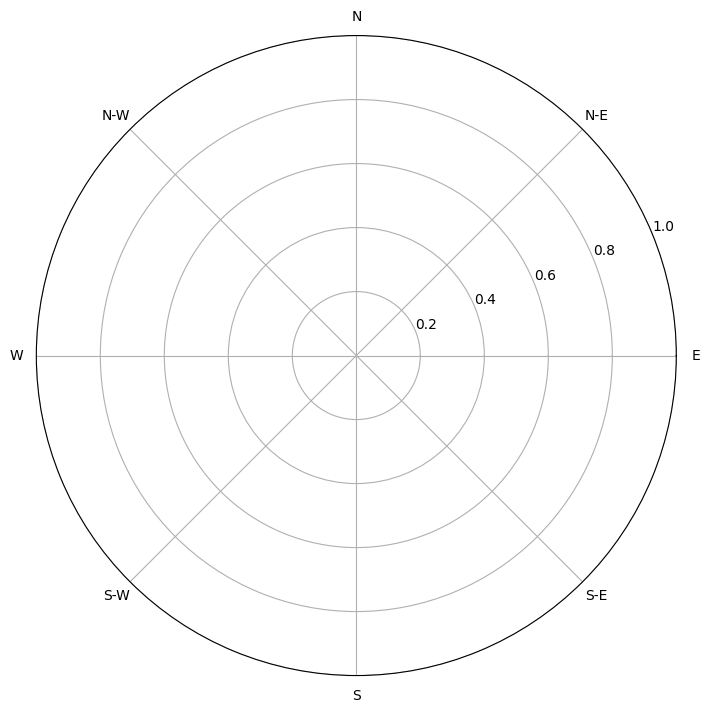

In [42]:
# Create a new figure and WindroseAxes
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

In [43]:
# Function to update the windrose plot for each time step
def animate(i):
    ax.clear()
    sub_data = data.iloc[:i+1]
    ax.bar(sub_data['Wind Dir V'], sub_data['Wind Speed V'], normed=True, opening=0.8, edgecolor='white')
    ax.set_title(f'Animated Windrose at {sub_data.iloc[-1]["Date"]} {sub_data.iloc[-1]["Time"]}')
    ax.set_legend()

In [44]:
# Create the animation
ani = FuncAnimation(fig, animate, frames=len(data), interval=1000, repeat=False)

# Display the animation
plt.show()

# Save the animation as a GIF using the Pillow backend
ani.save('windrose_annimation.gif', writer='pillow')